In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Credit-card-fraud',
 'Credit-card-fraud.zip',
 'Untitled.ipynb',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_copy = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Some exploratory analysis of the dataset.

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Number of samples of the dataset
len(df)

7043

In [7]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


There are several features to explore; some may be more significant and explicative than others. Something that I would like to do right now is checking if there are features that are not so relevant (correlated features, features with too many missing values or with a unique value) in order to reduce dimensionality of the data and also to reduce the model complexity.

These are the descriptions of the features of the dataset:
 
* customerID Customer ID
* gender Whether the customer is a senior citizen or not (1, 0)
* SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
* Partner Whether the customer has a partner or not (Yes, No)
* Dependents Whether the customer has dependents or not (Yes, No)
* tenure Number of months the customer has stayed with the company
* PhoneService Whether the customer has a phone service or not (Yes, No)
* MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges The amount charged to the customer monthly
* TotalCharges The total amount charged to the customer
* Churn Whether the customer churned or not (Yes or No)

The last one is the target variable, to build a model able to predict whether a customer churned or not.

In [8]:
# As a first thing, let's see the distribution of values for all features
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

We can see that there are no null values in any of the columns. The dataset might have been cleaned before uploading. 

In [10]:
# Check if there are features with uneven frequencies of the values 
for i, column in enumerate(df.columns):
    print(df[column].value_counts())

7153-CHRBV    1
4299-SIMNS    1
8515-OCTJS    1
8197-BFWVU    1
9256-JTBNZ    1
4589-IUAJB    1
7975-TZMLR    1
3092-IGHWF    1
8388-FYNPZ    1
4634-JLRJT    1
7521-YXVZY    1
6754-WKSHP    1
3308-MHOOC    1
9066-QRSDU    1
4074-SJFFA    1
0148-DCDOS    1
6077-BDPXA    1
7892-POOKP    1
6407-GSJNL    1
7530-HDYDS    1
6688-UZPWD    1
7872-RDDLZ    1
3662-FXJFO    1
4092-OFQZS    1
7931-PXHFC    1
7356-AYNJP    1
9603-OAIHC    1
4090-KPJIP    1
5445-GLVOT    1
4652-NNHNY    1
             ..
2985-JUUBZ    1
3038-PQIUY    1
1963-VAUKV    1
3522-CDKHF    1
6497-TILVL    1
6778-JFCMK    1
2851-MMUTZ    1
7486-KSRVI    1
5231-FIQPA    1
1439-LCGVL    1
1099-BTKWT    1
5143-WMWOG    1
3540-RZJYU    1
2657-ALMWY    1
3018-TFTSU    1
8180-AKMJV    1
3005-NFMTA    1
0396-UKGAI    1
1492-QGCLU    1
5364-EVNIB    1
3415-TAILE    1
1971-DTCZB    1
8945-MUQUF    1
8735-DCXNF    1
9479-HYNYL    1
4877-EVATK    1
6583-SZVGP    1
0616-ATFGB    1
6016-LVTJQ    1
1545-ACTAS    1
Name: customerID, Length

In [11]:
gender_churn = df.pivot_table(index = 'gender', columns='Churn', aggfunc='count', values='customerID')

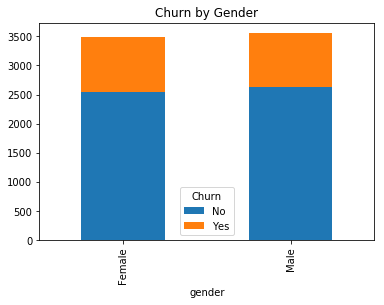

In [12]:
gender_churn.plot(kind='bar', stacked=True, title='Churn by Gender')

So, males are not more likely to churn than females and viceversa.
Another interesting feature than can tell a lot should be the tenure. In fact, the fidelization with the customer is one of the key points. Now I'll analyze this other feature.

C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


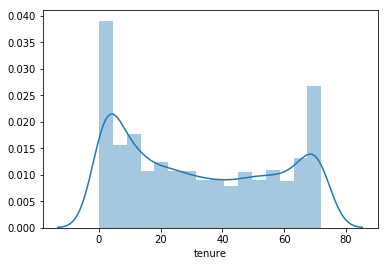

In [13]:
sns.distplot(df.tenure)

The distribution of values appears more or less even. The left tail of the distribution shows a higher peak, suggesting that a higher number of customers stays less months with the company.
Now, give a look at the MultipleLines feature. The more the products the customer purchases from the company, the more likely he should be not to churn, but I'll verify this one.

In [14]:
multipleLines_churn=df.pivot_table(index='MultipleLines', columns='Churn', aggfunc='count', values='customerID')

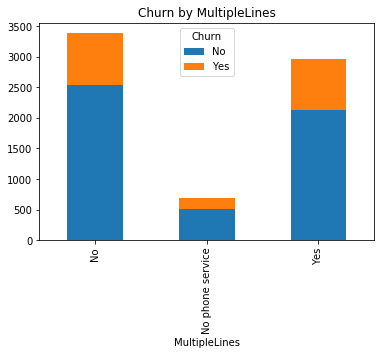

In [15]:
multipleLines_churn.plot(kind='bar', stacked=True, title='Churn by MultipleLines')

What can immediately be seen is that of all the customers, just a few do not have phone service the company, whereas for those who only own a line or multiple lines, the ratio between total and those who are leaving the company is approximately the same.

The column 'PhoneService' is not needed, because the 'MultipleLines' feature includes customers who do not have phone service, so it will be dropped.

In [16]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [17]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

QED: MultipleLines is more informative, so PhoneService can be dropped.

In [18]:
df = df.drop('PhoneService', axis=1)

Does having a partner or having dependents influence the decision of churning or not? 

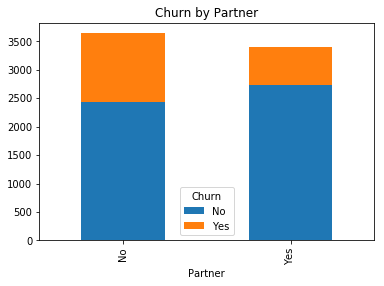

In [19]:
partner_churn = df.pivot_table(index='Partner', columns='Churn', aggfunc='count', values='customerID')
partner_churn.plot(kind='bar', stacked=True, title='Churn by Partner')

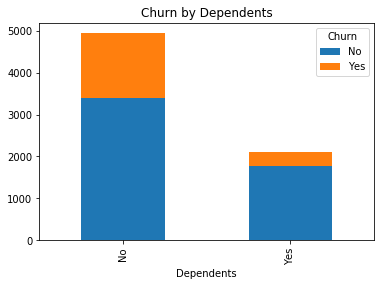

In [20]:
dependents_churn = df.pivot_table(index='Dependents', columns='Churn', aggfunc='count', values='customerID')
dependents_churn.plot(kind='bar', stacked=True, title='Churn by Dependents')

The values here are really unbalanced, but the ratio between churn and not churn in the case of dependents and no dependents change very much.

Here, for simplicity, I will assume that the streaming services are not influencing much the churn rate, given the fact that I don't know how important are for this company, but it depends from case to case. So, I will drop the StreamingTV and StreamingMovies columns.

In [21]:
df = df.drop(['StreamingTV', 'StreamingMovies'], axis=1)

Now, I will check the economic aspects of the problem, i.e. which is the influence of the contract type and method of payment chosen on churning.

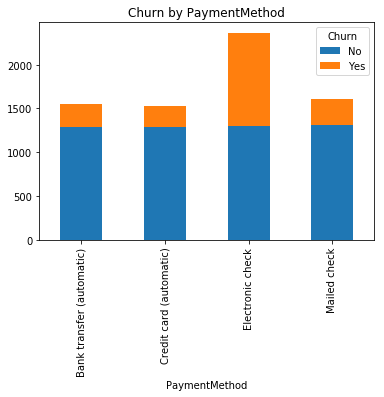

In [22]:
PaymentMethod_churn = df.pivot_table(index='PaymentMethod', columns='Churn', aggfunc='count', values='customerID')

PaymentMethod_churn.plot(kind='bar', stacked=True, title='Churn by PaymentMethod')

Here we see an interesting aspect. The number of customers who is leaving the company is much higher for the case of those paying with electronic check, so further investigation should be made to understand why they're not satisfied with this payment method and do something to counteract it.

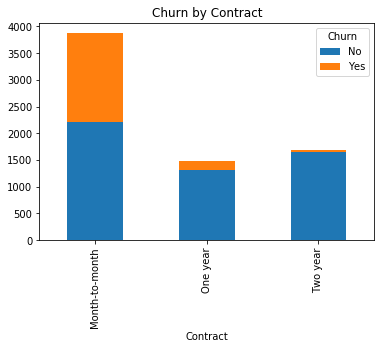

In [23]:
Contract_churn = df.pivot_table(index='Contract', columns='Churn', aggfunc='count', values='customerID')

Contract_churn.plot(kind='bar', stacked=True, title='Churn by Contract')

As expected, the percentage of those who churn is higher for customers who decide to pay month-by-month, and the trend confirms that fidelization is higher with customers who make one year or two year lasting contracts.

In [24]:
df[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.5
6,22,89.10,1949.4
7,10,29.75,301.9
8,28,104.80,3046.05
9,62,56.15,3487.95


As it can be seen, the TotalCharges are more or less the product of the tenure by the MonthlyCharges, so I will drop the total charges to avoid correlations.

In [25]:
df = df.drop('TotalCharges', axis=1)
df = df.drop(['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling'], axis=1)

## Data preparation and splitting into train and test sets

In [26]:
SeniorCitizen_churn = df.pivot_table(index='SeniorCitizen', columns = 'Churn', values='customerID', aggfunc='count')

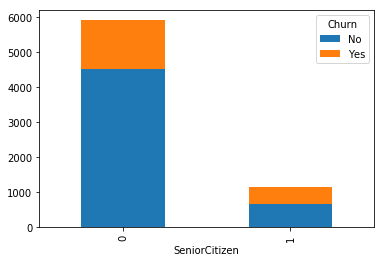

In [27]:
SeniorCitizen_churn.plot(kind='bar', stacked=True)

### Some data Preparation.
Data needs to be prepared in order to use logistic regression on it, i.e. one must transform categorical variables.

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,Contract,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No phone service,Month-to-month,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,No,One year,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,No,Month-to-month,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No phone service,One year,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,No,Month-to-month,Electronic check,70.70,Yes


The categorical variables are 'gender', 'Partner', 'Dependents','MultipleLines','Contract', 'PaymentMethod'. I will treat the 'Churn' feature differently. 

In [30]:
cat_variables = ['gender', 'Partner', 'Dependents','MultipleLines','Contract', 'PaymentMethod']

In [31]:
df_processed=pd.get_dummies(df, prefix_sep='__', columns=cat_variables)

,customerID,SeniorCitizen,tenure,MonthlyCharges,Churn,gender__Female,gender__Male,Partner__No,Partner__Yes,Dependents__No,...,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,7590-VHVEG,0,1,29.85,No,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,No,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,Yes,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,No,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,Yes,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,8,99.65,Yes,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
6,1452-KIOVK,0,22,89.10,No,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
7,6713-OKOMC,0,10,29.75,No,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
8,7892-POOKP,0,28,104.80,Yes,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
9,6388-TABGU,0,62,56.15,No,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf_1 = LogisticRegression()

In [35]:
# The classifier is already loaded. Now I will separate train and test sets 
from sklearn.model_selection import train_test_split
df_processed['Churn'] = df_processed.Churn.eq('Yes').mul(1)

In [36]:
X_train, X_test, y_train,y_test = train_test_split(df_processed.drop(['customerID','Churn'], axis=1), df_processed['Churn'], test_size = 0.2)

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1, 100]}

In [38]:
grid_clf_1 = GridSearchCV(clf_1, parameters, cv=10)

In [39]:
grid_clf_1.fit(X_train,y_train)

C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 100]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=0)

In [40]:
grid_clf_1.score(X_test,y_test)

0.7977288857345636

In [41]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_test,grid_clf_1.predict(X_test))

0.5714285714285714

When using dummy variables, one can reduce the number of features by considering the dummy variable trap.

In [44]:
df_processed.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,Churn,gender__Female,gender__Male,Partner__No,Partner__Yes,Dependents__No,...,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,7590-VHVEG,0,1,29.85,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,34,56.95,0,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,1,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0


In [45]:
df_processed.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'gender__Female', 'gender__Male', 'Partner__No', 'Partner__Yes',
       'Dependents__No', 'Dependents__Yes', 'MultipleLines__No',
       'MultipleLines__No phone service', 'MultipleLines__Yes',
       'Contract__Month-to-month', 'Contract__One year', 'Contract__Two year',
       'PaymentMethod__Bank transfer (automatic)',
       'PaymentMethod__Credit card (automatic)',
       'PaymentMethod__Electronic check', 'PaymentMethod__Mailed check'],
      dtype='object')

In [46]:
df_processed_2 = df_processed.drop(['gender__Male', 'Partner__Yes','Dependents__Yes',
                                    'MultipleLines__Yes','Contract__Two year', 'PaymentMethod__Mailed check'], axis=1)

In [76]:
X_train2, X_test2, y_train2,y_test2 = train_test_split(df_processed_2.drop(['customerID','Churn'], axis=1), df_processed_2['Churn'], test_size = 0.3, random_state=1)

In [77]:
clf_2 = LogisticRegression(C=100)

In [78]:
clf_2.fit(X_train2,y_train2)

C:\Users\Andrea\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
clf_2.score(X_test2,y_test2)

0.8021769995267393